In [1]:
!pip install census

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import json

# Census API Key
from config import ckey
c = Census(ckey)

# Getting export and import Data from NAICS - this part not relating to our Project

In [3]:
url_import="https://api.census.gov/data/timeseries/intltrade/imports/naics?get=CTY_CODE,CTY_NAME,GEN_VAL_MO,GEN_VAL_YR&time=from+2017-01+to+2017-12"
url_export="https://api.census.gov/data/timeseries/intltrade/exports/naics?get=CTY_CODE,CTY_NAME,ALL_VAL_MO,ALL_VAL_YR&time=from+2017-01+to+2017-12"
export_data = requests.get(url_export).json()
import_data = requests.get(url_import).json()
#print(len(export_data))
#print(import_data)
#print(json.dumps(import_data, indent=4, sort_keys=True))
#print(export_data[19][1])

Export_countrycode=[]
Export_countryname=[]
Export_totalvalue=[]
Export_year_date_value=[]
Export_time=[]


Import_countrycode=[]
Import_countryname=[]
Import_totalvalue=[]
Import_year_date_value=[]
Import_time=[]
Country_grouping=""

print(export_data[1][0])

x=1
y=1
while x <len(export_data):
    if export_data[x][0]=="0001":
        Country_grouping = "OPEC"
    elif export_data[x][0]=="0003":
        Country_grouping = "EUROPEAN UNION"
    elif export_data[x][0]=="0014":
        Country_grouping = "PACIFIC RIM COUNTRIES"
    elif export_data[x][0]=="0017":
        Country_grouping = "CAFTA-DR"
    elif export_data[x][0]=="0020":
        Country_grouping = "NAFTA"
    elif export_data[x][0]=="0021":
        Country_grouping = "TWENTY LATIN AMERICAN REPUBLICS"
    elif export_data[x][0]=="0022":
        Country_grouping = "OECD"
    elif export_data[x][0]=="0023":
        Country_grouping = "NATO"
    elif export_data[x][0]=="0024":
        Country_grouping = "LAFTA"
    elif export_data[x][0]=="0025":
        Country_grouping = "EURO AREA"
    elif export_data[x][0]=="0026":
        Country_grouping = "APEC"
    elif export_data[x][0]=="0027":
        Country_grouping = "ASEAN"
    elif export_data[x][0]=="0028":
        Country_grouping = "CACM"
    elif export_data[x][0]=="1XXX":
        Country_grouping = "NORTH AMERICA"
    elif export_data[x][0]=="2XXX":
        Country_grouping = "CENTRAL AMERICA"
    elif export_data[x][0]=="3XXX":
        Country_grouping = "SOUTH AMERICA"
    elif export_data[x][0]=="4XXX":
        Country_grouping = "EUROPE"
    elif export_data[x][0]=="5XXX":
        Country_grouping = "ASIA"
    elif export_data[x][0]=="6XXX":
        Country_grouping = "AUSTRALIA AND OCEANIA"
    elif export_data[x][0]=="7XXX":
        Country_grouping = "AFRICA"
    elif import_data[x][0]=="":
        Country_grouping = export_data[x][0]
    else:
        Country_grouping = export_data[x][1]
        
    Export_countrycode.append(Country_grouping)
    Export_countryname.append(export_data[x][1])
    Export_totalvalue.append(int(export_data[x][2]))
    Export_year_date_value.append(int(export_data[x][3]))
    Export_time.append(export_data[x][4])
    x= x+1
Country_grouping=""
while y <len(import_data):
    if import_data[y][0]=="0001":
        Country_grouping = "OPEC"
    elif import_data[y][0]=="0003":
        Country_grouping = "EUROPEAN UNION"
    elif import_data[y][0]=="0014":
        Country_grouping = "PACIFIC RIM COUNTRIES"
    elif import_data[y][0]=="0017":
        Country_grouping = "CAFTA-DR"
    elif import_data[y][0]=="0020":
        Country_grouping = "NAFTA"
    elif import_data[y][0]=="0021":
        Country_grouping = "TWENTY LATIN AMERICAN REPUBLICS"
    elif import_data[y][0]=="0022":
        Country_grouping = "OECD"
    elif import_data[y][0]=="0023":
        Country_grouping = "NATO"
    elif import_data[y][0]=="0024":
        Country_grouping = "LAFTA"
    elif import_data[y][0]=="0025":
        Country_grouping = "EURO AREA"
    elif import_data[y][0]=="0026":
        Country_grouping = "APEC"
    elif import_data[y][0]=="0027":
        Country_grouping = "ASEAN"
    elif import_data[y][0]=="0028":
        Country_grouping = "CACM"
    elif import_data[y][0]=="1XXX":
        Country_grouping = "NORTH AMERICA"
    elif import_data[y][0]=="2XXX":
        Country_grouping = "CENTRAL AMERICA"
    elif import_data[y][0]=="3XXX":
        Country_grouping = "SOUTH AMERICA"
    elif import_data[y][0]=="4XXX":
        Country_grouping = "EUROPE"
    elif import_data[y][0]=="5XXX":
        Country_grouping = "ASIA"
    elif import_data[y][0]=="6XXX":
        Country_grouping = "AUSTRALIA AND OCEANIA"
    elif import_data[y][0]=="7XXX":
        Country_grouping = "AFRICA"
    elif import_data[y][0]=="":
        Country_grouping = import_data[y][0]
    else:
        Country_grouping = import_data[y][1]
    
    Import_countrycode.append(Country_grouping)
    Import_countryname.append(import_data[y][1])
    Import_totalvalue.append(int(import_data[y][2]))
    Import_year_date_value.append(int(import_data[y][3]))
    Import_time.append(import_data[y][4])
    y= y+1
export_df= pd.DataFrame({"Country Grouping":Export_countrycode,"Country Name":Export_countryname,"Total Value":Export_totalvalue,"Year to Date Total Value":Export_year_date_value,"Time":Export_time})
import_df= pd.DataFrame({"Country Grouping":Import_countrycode,"Country Name":Import_countryname,"Total Value":Import_totalvalue,"Year to Date Total Value":Import_year_date_value,"Time":Import_time})

import_df.head(15)

,Country Grouping,Country Name,Time,Total Value,Year to Date Total Value
0,,TOTAL FOR ALL COUNTRIES,2017-01,185671930029,185671930029
1,,TOTAL FOR ALL COUNTRIES,2017-02,169391887793,355063817822
2,,TOTAL FOR ALL COUNTRIES,2017-03,194258307901,549322125723
3,,TOTAL FOR ALL COUNTRIES,2017-04,186149627407,735471753130
4,,TOTAL FOR ALL COUNTRIES,2017-05,200596866806,936068619936
5,,TOTAL FOR ALL COUNTRIES,2017-06,198447405018,1134516024954
6,,TOTAL FOR ALL COUNTRIES,2017-07,192043641101,1326559666055
7,,TOTAL FOR ALL COUNTRIES,2017-08,201820890679,1528380556734
8,,TOTAL FOR ALL COUNTRIES,2017-09,194796034042,1723176590776
9,,TOTAL FOR ALL COUNTRIES,2017-10,210731917372,1933908508148


In [4]:
group_import = import_df.groupby(['Country Name'])
total_airvalue = group_import['Total Value'].sum()


group_export = export_df.groupby(['Country Name'])
total_totalvalue = group_export['Total Value'].sum()

im=total_airvalue.to_frame().reset_index()
#df = df.rename(columns= {0: 'list'})
#df.index.name = 'index'
ex= total_totalvalue.to_frame().reset_index()

In [5]:
#check_data = b[b['Country Name']=='CUBA']
#check_data
consol_data = pd.merge(im,ex, how="outer")
consol_data.to_csv("import&export.csv")

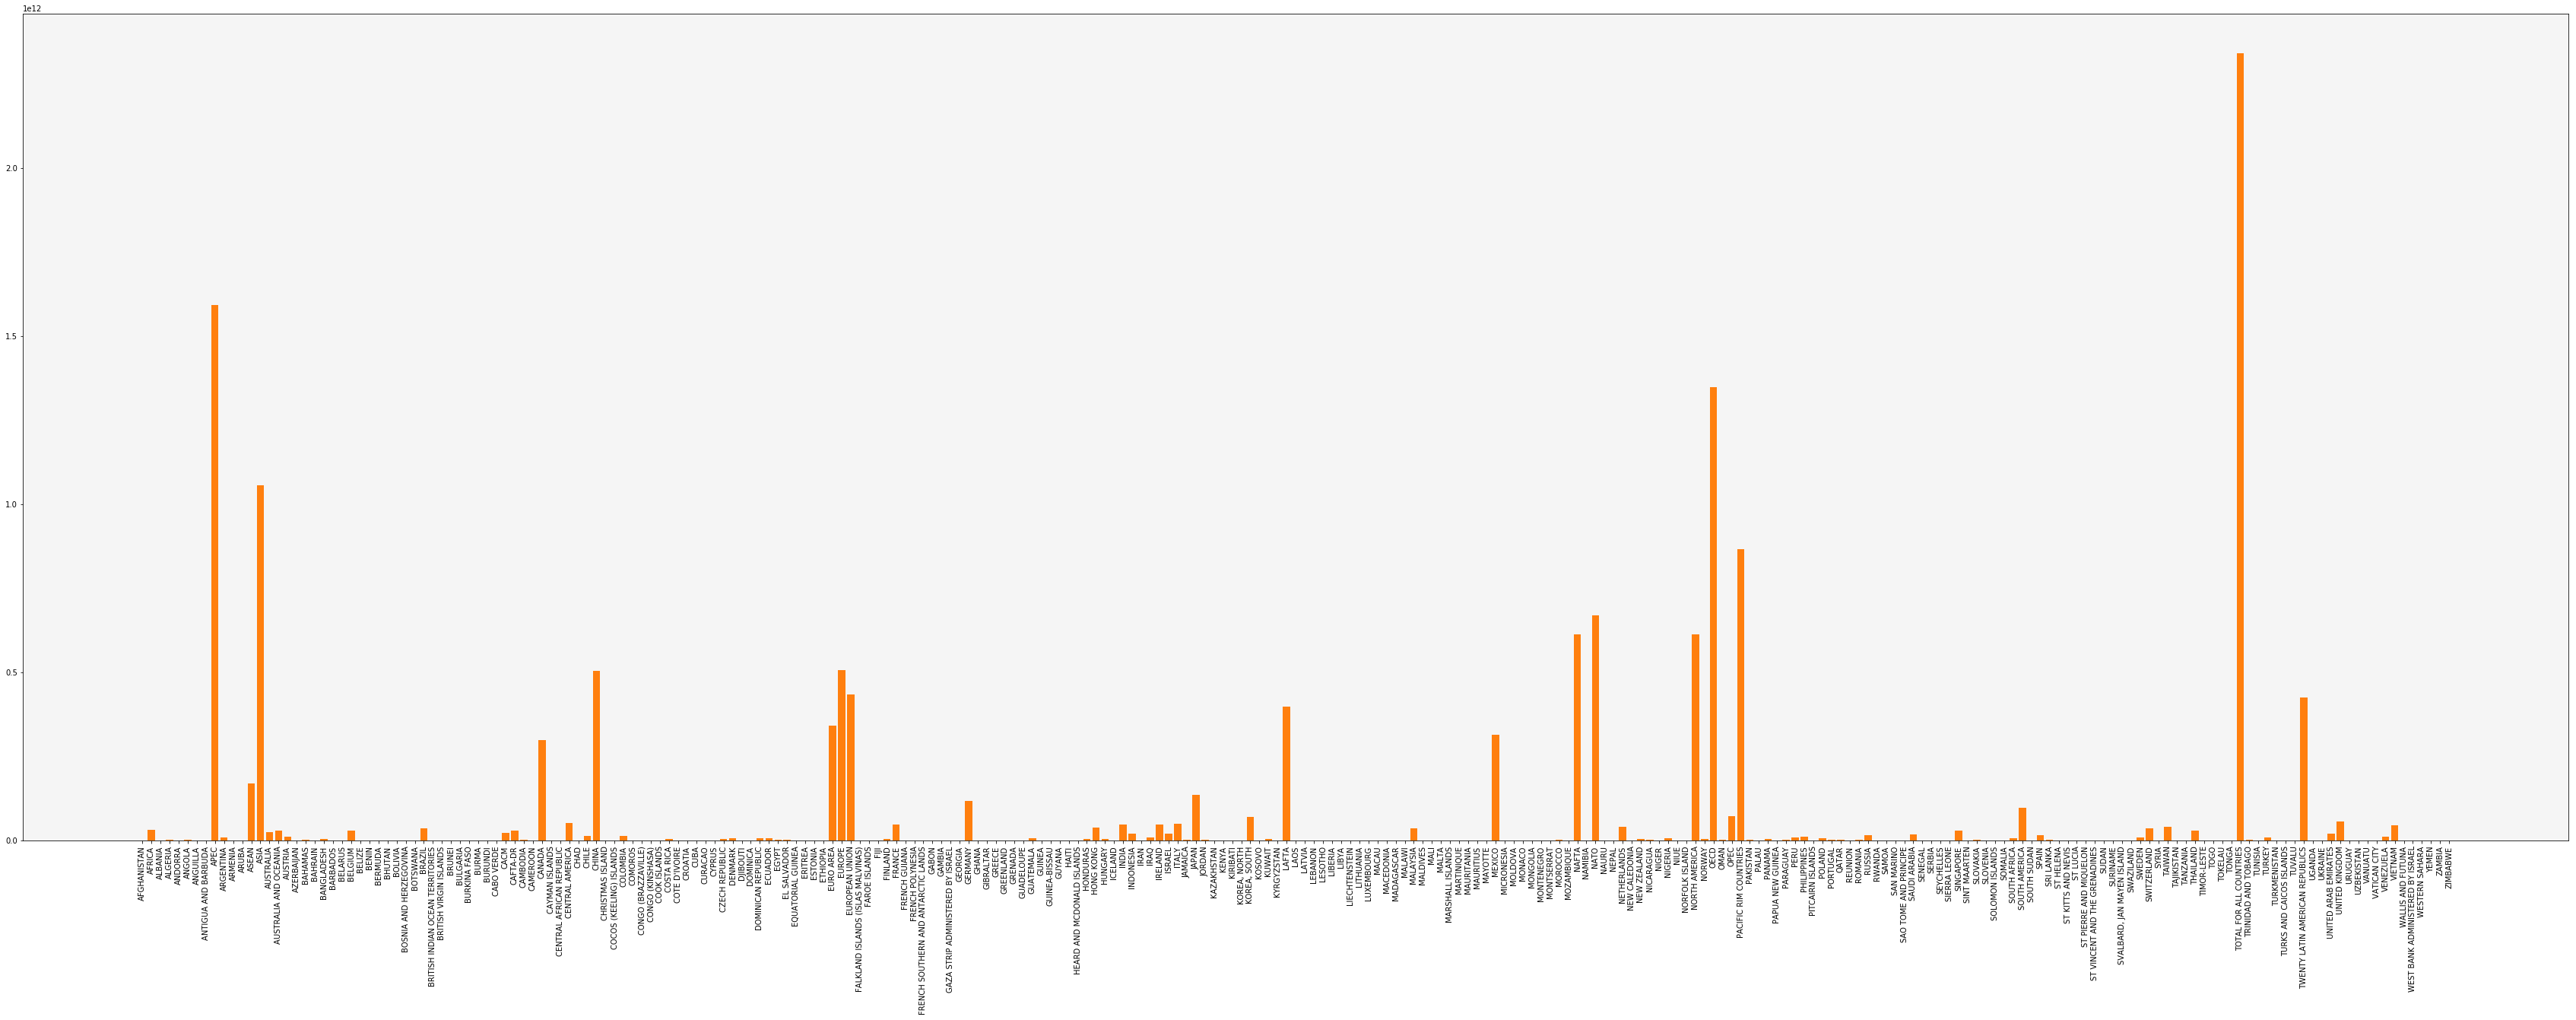

In [6]:
ax = plt.figure(figsize=(60,20)).add_subplot(111)
#Set background color,size and space of bar charts
ax.patch.set_facecolor('whitesmoke')
ax.bar(consol_data['Country Name'],consol_data['Total Value'])
ax.bar(consol_data['Country Name'],consol_data['Total Value'])
plt.xticks(rotation=90)
plt.show()

# Main part for the project, getting HITECH product types imported to U.S in 2017

In [335]:
#Retrieve data for HITECH
url_hitechim = "https://api.census.gov/data/timeseries/intltrade/imports/hitech?get=CTY_CODE,CTY_NAME,HITECH,HITECH_DESC,GEN_VAL_MO,GEN_VAL_YR&time=2017&key=f71e81f058685a925a2f209f4ae23944770802fa"
import_hitechdata = requests.get(url_hitechim).json()
#export_hitechdata= requests.get(url_hitechex).json()
#print(json.dumps(export_hitechdata, indent=4, sort_keys=True))
Import_hicountrycode=[]
Import_hicountryname=[]
Import_hitechcode=[]
Import_hitechname=[]
Import_hitotalvalue=[]
Import_hiyear_date_value=[]
Import_hitime=[]

i=1
while i <len(import_hitechdata):
    Import_hicountrycode.append(import_hitechdata[i][0])
    Import_hicountryname.append(import_hitechdata[i][1])
    Import_hitechcode.append(import_hitechdata[i][2])
    Import_hitechname.append(import_hitechdata[i][3])
    Import_hitotalvalue.append(int(import_hitechdata[i][4]))
    Import_hiyear_date_value.append(int(import_hitechdata[i][5]))
    Import_hitime.append(import_hitechdata[i][6])
    i= i+1

import_hitechdata_df= pd.DataFrame({"Country Code":Import_hicountrycode,"Country Name":Import_hicountryname,"Hitech code":Import_hitechcode,"Hitech Name":Import_hitechname,"Total Value":Import_hitotalvalue,"Year to Date Total Value":Import_hiyear_date_value,"Time":Import_hitime})

import_hitechdata_df.head(50)

,Country Code,Country Name,Hitech Name,Hitech code,Time,Total Value,Year to Date Total Value
0,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-01,185671930029,185671930029
1,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-02,169391887793,355063817822
2,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-03,194258307901,549322125723
3,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-04,186149627407,735471753130
4,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-05,200596866806,936068619936
5,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-06,198447405018,1134516024954
6,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-07,192043641101,1326559666055
7,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-08,201820890679,1528380556734
8,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-09,194796034042,1723176590776
9,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-10,210731917372,1933908508148


# Hitech Product Types start with code 01-10 so have to clean the data 

In [313]:
#as Hitech Products start with code 01-10 so have to clean the data 
hitech_df=import_hitechdata_df[(import_hitechdata_df["Hitech code"] !="") & (import_hitechdata_df["Hitech code"] !="00") & (import_hitechdata_df["Country Name"] !="TOTAL FOR ALL COUNTRIES")]
#hitech_df.head(150)
#Group by Hitech Code, Hitech Name and Country Name to find largest hitech products import into U.S in 2017
hitech_group=hitech_df.groupby(["Hitech code","Country Name","Hitech Name"]).sum()
#hitech_group.head(200)
hitech_group.reset_index(inplace=True)

#Find largest hitech products imports into US,2017
bioim_largest = hitech_group[hitech_group["Hitech Name"] == "BIOTECHNOLOGY [01]"].nlargest(1,'Total Value')
lifescim_largest = hitech_group[hitech_group["Hitech Name"] == "LIFE SCIENCE [02]"].nlargest(1,'Total Value')
optoim_largest = hitech_group[hitech_group["Hitech Name"] == "OPTO-ELECTRONICS [03]"].nlargest(1,'Total Value')
ictim_largest = hitech_group[hitech_group["Hitech Name"] == "INFORMATION & COMMUNICATIONS [04]"].nlargest(1,'Total Value')
elecim_largest = hitech_group[hitech_group["Hitech Name"] == "ELECTRONICS [05]"].nlargest(1,'Total Value')
flexim_largest = hitech_group[hitech_group["Hitech Name"] == "FLEXIBLE MANUFACTURING [06]"].nlargest(1,'Total Value')
advmatim_largest = hitech_group[hitech_group["Hitech Name"] == "ADVANCED MATERIALS [07]"].nlargest(1,'Total Value')
aeroim_largest = hitech_group[hitech_group["Hitech Name"] == "AEROSPACE [08]"].nlargest(1,'Total Value')
wpim_largest = hitech_group[hitech_group["Hitech Name"] == "WEAPONS [09]"].nlargest(1,'Total Value')
nuclim_largest = hitech_group[hitech_group["Hitech Name"] == "NUCLEAR TECHNOLOGY [10]"].nlargest(1,'Total Value')

largest =pd.concat([bioim_largest,lifescim_largest,optoim_largest,ictim_largest,elecim_largest,flexim_largest,advmatim_largest,aeroim_largest,wpim_largest,nuclim_largest])

largest["Total Value"] = round(largest["Total Value"]/1000000,2)
largest

,Hitech code,Country Name,Hitech Name,Total Value,Year to Date Total Value
60,01,OECD,BIOTECHNOLOGY [01],25165.87,155732014641
198,02,OECD,LIFE SCIENCE [02],37024.51,240354598372
248,03,APEC,OPTO-ELECTRONICS [03],21114.82,116905897145
366,04,APEC,INFORMATION & COMMUNICATIONS [04],250019.31,1514097309985
585,05,APEC,ELECTRONICS [05],36006.87,226531613806
850,06,OECD,FLEXIBLE MANUFACTURING [06],10511.70,67230674649
897,07,APEC,ADVANCED MATERIALS [07],2345.08,14990813498
1090,08,OECD,AEROSPACE [08],42385.92,266302857963
1195,09,OECD,WEAPONS [09],622.98,3901949472
1247,10,EUROPE,NUCLEAR TECHNOLOGY [10],1549.85,9065199959


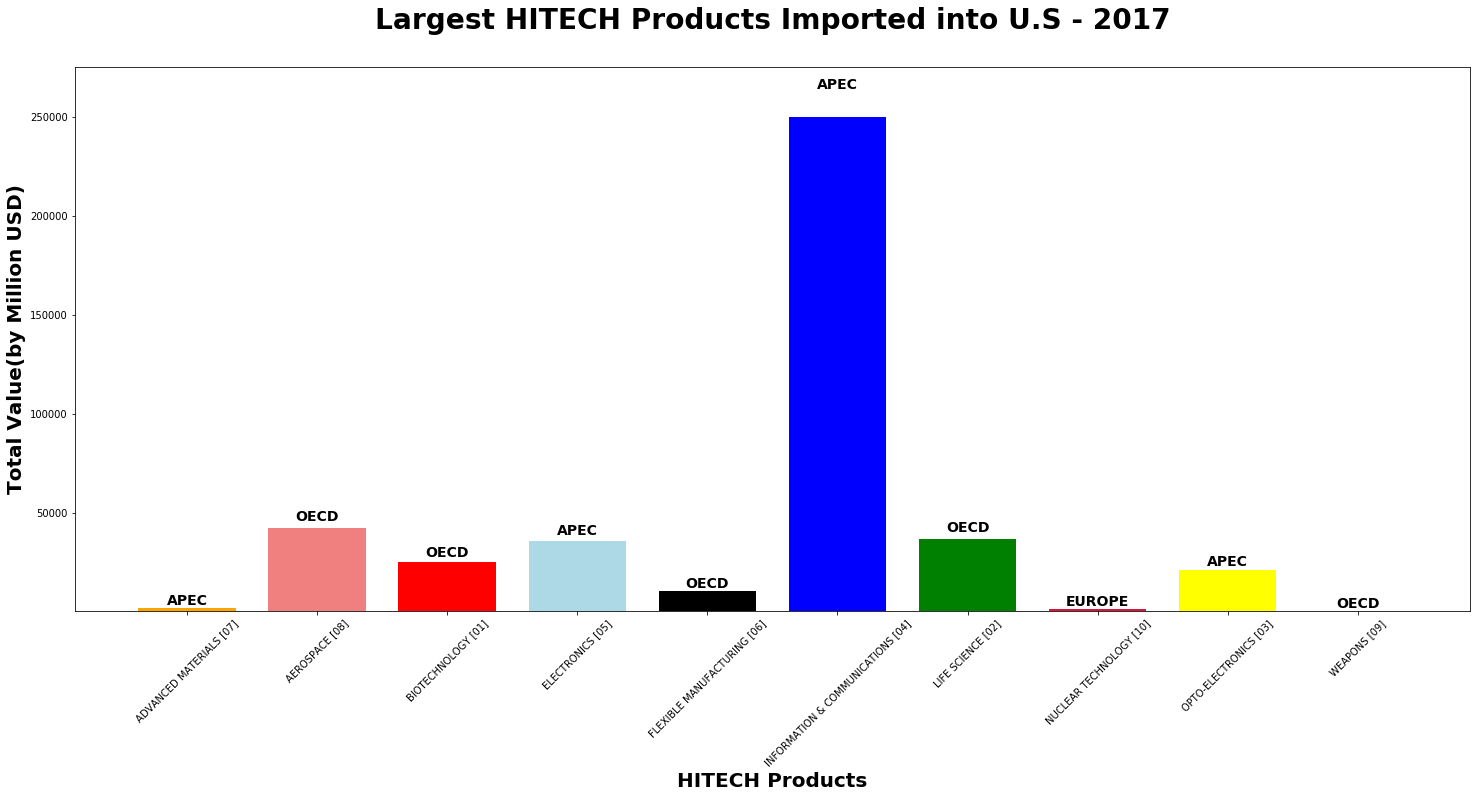

In [9]:
ax = plt.figure(figsize=(25,10)).add_subplot(111)
ch=ax.bar(largest['Hitech Name'],largest['Total Value'],color=["red","green","yellow","blue","lightblue","black","orange","lightcoral","deeppink","crimson"],width = 0.75)

for i in range(len(ch)):
        height = ch[i].get_height()
        value=  largest.iloc[i]['Country Name']
        ax.text(ch[i].get_x() + ch[i].get_width()/2, 1.05*height,value,
                ha='center', va='bottom',fontsize = 14,fontweight="bold")
        
ax.set_ylim(min(largest['Total Value']),max(largest['Total Value'])*1.1)
plt.xticks(rotation=45)
ax.set_title("Largest HITECH Product Types Imported to U.S - 2017\n", fontsize = 28,fontweight="bold")
ax.set_xlabel('HITECH Products',fontsize = 20,fontweight="bold")
ax.set_ylabel('Total Value(by Million USD)',fontsize = 20,fontweight="bold")
plt.savefig("largestimport.png")
plt.show()

# After clarifying the largest value of product type imported to U.S -2017, go details to see which products in that type

In [321]:
df1 = pd.read_csv('ICT.csv')

Importdetail_totalvalue=[]
Importdetail_time=[]
Importdetail_CTYNAME=[]
ImHitechdetail=[]
ImHitechdetaildesc=[]

print(len(df1))
for i in range(len(df1)):
    checkerror = False
    check1=df1["ICT code"][i]
    try:
        import_datacode = requests.get(f"https://api.census.gov/data/timeseries/intltrade/imports/hs?get=CTY_CODE,CTY_NAME,GEN_VAL_MO&time=2017&CTY_NAME=APEC&I_COMMODITY={check1}&key=f71e81f058685a925a2f209f4ae23944770802fa").json()
    except Exception:
        checkerror = True
        print("ICT code is error or null of value")
    if checkerror == False :
        c=1
        while c < len(import_datacode):
            ImHitechdetaildesc.append(df1["ICT desc"][i])
            Importdetail_totalvalue.append(int(import_datacode[c][2]))
            Importdetail_time.append(import_datacode[c][3])
            Importdetail_CTYNAME.append(import_datacode[c][4])
            ImHitechdetail.append(import_datacode[c][5])
            c=c+1
import_hitechdetails= pd.DataFrame({"ICT detail Code":ImHitechdetail,"ICT detail desc":ImHitechdetaildesc,"Country Name":Importdetail_CTYNAME,"Total Value":Importdetail_totalvalue,"Time":Importdetail_time})

print(sum(Importdetail_totalvalue))

136
ICT code is error or null of value
ICT code is error or null of value
ICT code is error or null of value
ICT code is error or null of value
250019312478
[['CTY_CODE', 'CTY_NAME', 'GEN_VAL_MO', 'time', 'CTY_NAME', 'I_COMMODITY'], ['0026', 'APEC', '85349', '2017-01', 'APEC', '9017208040'], ['0026', 'APEC', '40446', '2017-02', 'APEC', '9017208040'], ['0026', 'APEC', '23528', '2017-03', 'APEC', '9017208040'], ['0026', 'APEC', '46467', '2017-04', 'APEC', '9017208040'], ['0026', 'APEC', '26239', '2017-05', 'APEC', '9017208040'], ['0026', 'APEC', '213097', '2017-06', 'APEC', '9017208040'], ['0026', 'APEC', '20531', '2017-07', 'APEC', '9017208040'], ['0026', 'APEC', '73656', '2017-08', 'APEC', '9017208040'], ['0026', 'APEC', '107141', '2017-09', 'APEC', '9017208040'], ['0026', 'APEC', '21430', '2017-10', 'APEC', '9017208040'], ['0026', 'APEC', '18391', '2017-11', 'APEC', '9017208040'], ['0026', 'APEC', '58161', '2017-12', 'APEC', '9017208040']]


In [324]:
ictdetail_plot = import_hitechdetails.groupby(["ICT detail Code","ICT detail desc"]).sum()
ictdetail_plot.reset_index(inplace=True)

In [328]:
tọp5ICTproducts = ictdetail_plot.nlargest(5,'Total Value')
tọp5ICTproducts



,ICT detail Code,ICT detail desc,Total Value
45,8517120050,CELLULAR RADIOTELEPHONES FOR PCRS,55092049196
50,8517620050,"MACH FOR RECP/CONVER/ETC OF VOICE/IMAGE/DATA,N...",43796273757
9,8471300100,"PORT DGTL ADP MACH,< 10 KG,AT LEAST CPU,KBRD,D...",39921952753
14,8471500150,"PROC UNT IN HOUS W/ EITHER STOR, IN&OUTPUT,W/O...",22876381139
35,8473301140,"PTS ADP MCH, NT INCPTG CRT,PRT CT ASM.,MRY MOD...",11525080266


# # another part for the project, getting HITECH product types exported from U.S in 2017

In [10]:
#Export data for HITECH Products:

url_hitechex="https://api.census.gov/data/timeseries/intltrade/exports/hitech?get=CTY_CODE,CTY_NAME,HITECH,HITECH_DESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2017-01+to+2017-12&key=f71e81f058685a925a2f209f4ae23944770802fa"
export_hitechdata= requests.get(url_hitechex).json()
#print(json.dumps(export_hitechdata, indent=4, sort_keys=True))
Export_hicountrycode=[]
Export_hicountryname=[]
Export_hitechcode=[]
Export_hitechname=[]
Export_hitotalvalue=[]
Export_hiyear_date_value=[]
Export_hitime=[]
i=1
while i <len(export_hitechdata):
    Export_hicountrycode.append(export_hitechdata[i][0])
    Export_hicountryname.append(export_hitechdata[i][1])
    Export_hitechcode.append(export_hitechdata[i][2])
    Export_hitechname.append(export_hitechdata[i][3])
    Export_hitotalvalue.append(int(export_hitechdata[i][4]))
    Export_hiyear_date_value.append(int(export_hitechdata[i][5]))
    Export_hitime.append(export_hitechdata[i][6])
    i= i+1
export_hitechdata_df= pd.DataFrame({"Country Code":Export_hicountrycode,"Country Name":Export_hicountryname,"Hitech code":Export_hitechcode,"Hitech Name":Export_hitechname,"Total Value":Export_hitotalvalue,"Year to Date Total Value":Export_hiyear_date_value,"Time":Export_hitime})
export_hitechdata_df.head()

,Country Code,Country Name,Hitech Name,Hitech code,Time,Total Value,Year to Date Total Value
0,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-01,117458099885,117458099885
1,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-02,119251603769,236709703654
2,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-03,135904939630,372614643284
3,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-04,123841552401,496456195685
4,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-05,127781985882,624238181567


# Hitech Product Types start with code 01-10 so have to clean the data 

In [11]:
#as Hitech Products start with code 01-10 so have to clean the data 
hitechex_df=export_hitechdata_df[(export_hitechdata_df["Hitech code"] !="") & (export_hitechdata_df["Hitech code"] !="00") & (export_hitechdata_df["Country Name"] !="TOTAL FOR ALL COUNTRIES")]
#hitech_df.head(150)
#Group by Hitech Code, Hitech Name and Country Name to find largest hitech products export to U.S in 2017
hitechex_group=hitechex_df.groupby(["Hitech code","Country Name","Hitech Name"]).sum()
#hitech_group.head(200)
hitechex_group.reset_index(inplace=True)

#Find largest hitech products imports into US,2017
bioim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "BIOTECHNOLOGY [01]"].nlargest(1,'Total Value')
lifescim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "LIFE SCIENCE [02]"].nlargest(1,'Total Value')
optoim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "OPTO-ELECTRONICS [03]"].nlargest(1,'Total Value')
ictim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "INFORMATION & COMMUNICATIONS [04]"].nlargest(1,'Total Value')
elecim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "ELECTRONICS [05]"].nlargest(1,'Total Value')
flexim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "FLEXIBLE MANUFACTURING [06]"].nlargest(1,'Total Value')
advmatim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "ADVANCED MATERIALS [07]"].nlargest(1,'Total Value')
aeroim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "AEROSPACE [08]"].nlargest(1,'Total Value')
wpim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "WEAPONS [09]"].nlargest(1,'Total Value')
nuclim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "NUCLEAR TECHNOLOGY [10]"].nlargest(1,'Total Value')

largestex =pd.concat([bioim_largest_ex,lifescim_largest_ex,optoim_largest_ex,ictim_largest_ex,elecim_largest_ex,flexim_largest_ex,advmatim_largest_ex,aeroim_largest_ex,wpim_largest_ex,nuclim_largest_ex])
largestex["Total Value"] = round(largestex["Total Value"]/1000000,2)
largestex

,Hitech code,Country Name,Hitech Name,Total Value,Year to Date Total Value
123,01,OECD,BIOTECHNOLOGY [01],16400.33,112202738578
340,02,OECD,LIFE SCIENCE [02],19812.53,126913831880
422,03,APEC,OPTO-ELECTRONICS [03],3133.41,19894939004
631,04,APEC,INFORMATION & COMMUNICATIONS [04],62621.98,394930667051
874,05,APEC,ELECTRONICS [05],40635.28,260450184270
1089,06,APEC,FLEXIBLE MANUFACTURING [06],16840.08,107706326837
1413,07,OECD,ADVANCED MATERIALS [07],1918.70,12612455268
1623,08,OECD,AEROSPACE [08],74039.54,470675439044
1706,09,ASIA,WEAPONS [09],3108.54,16780711578
1847,10,APEC,NUCLEAR TECHNOLOGY [10],602.33,4668818147


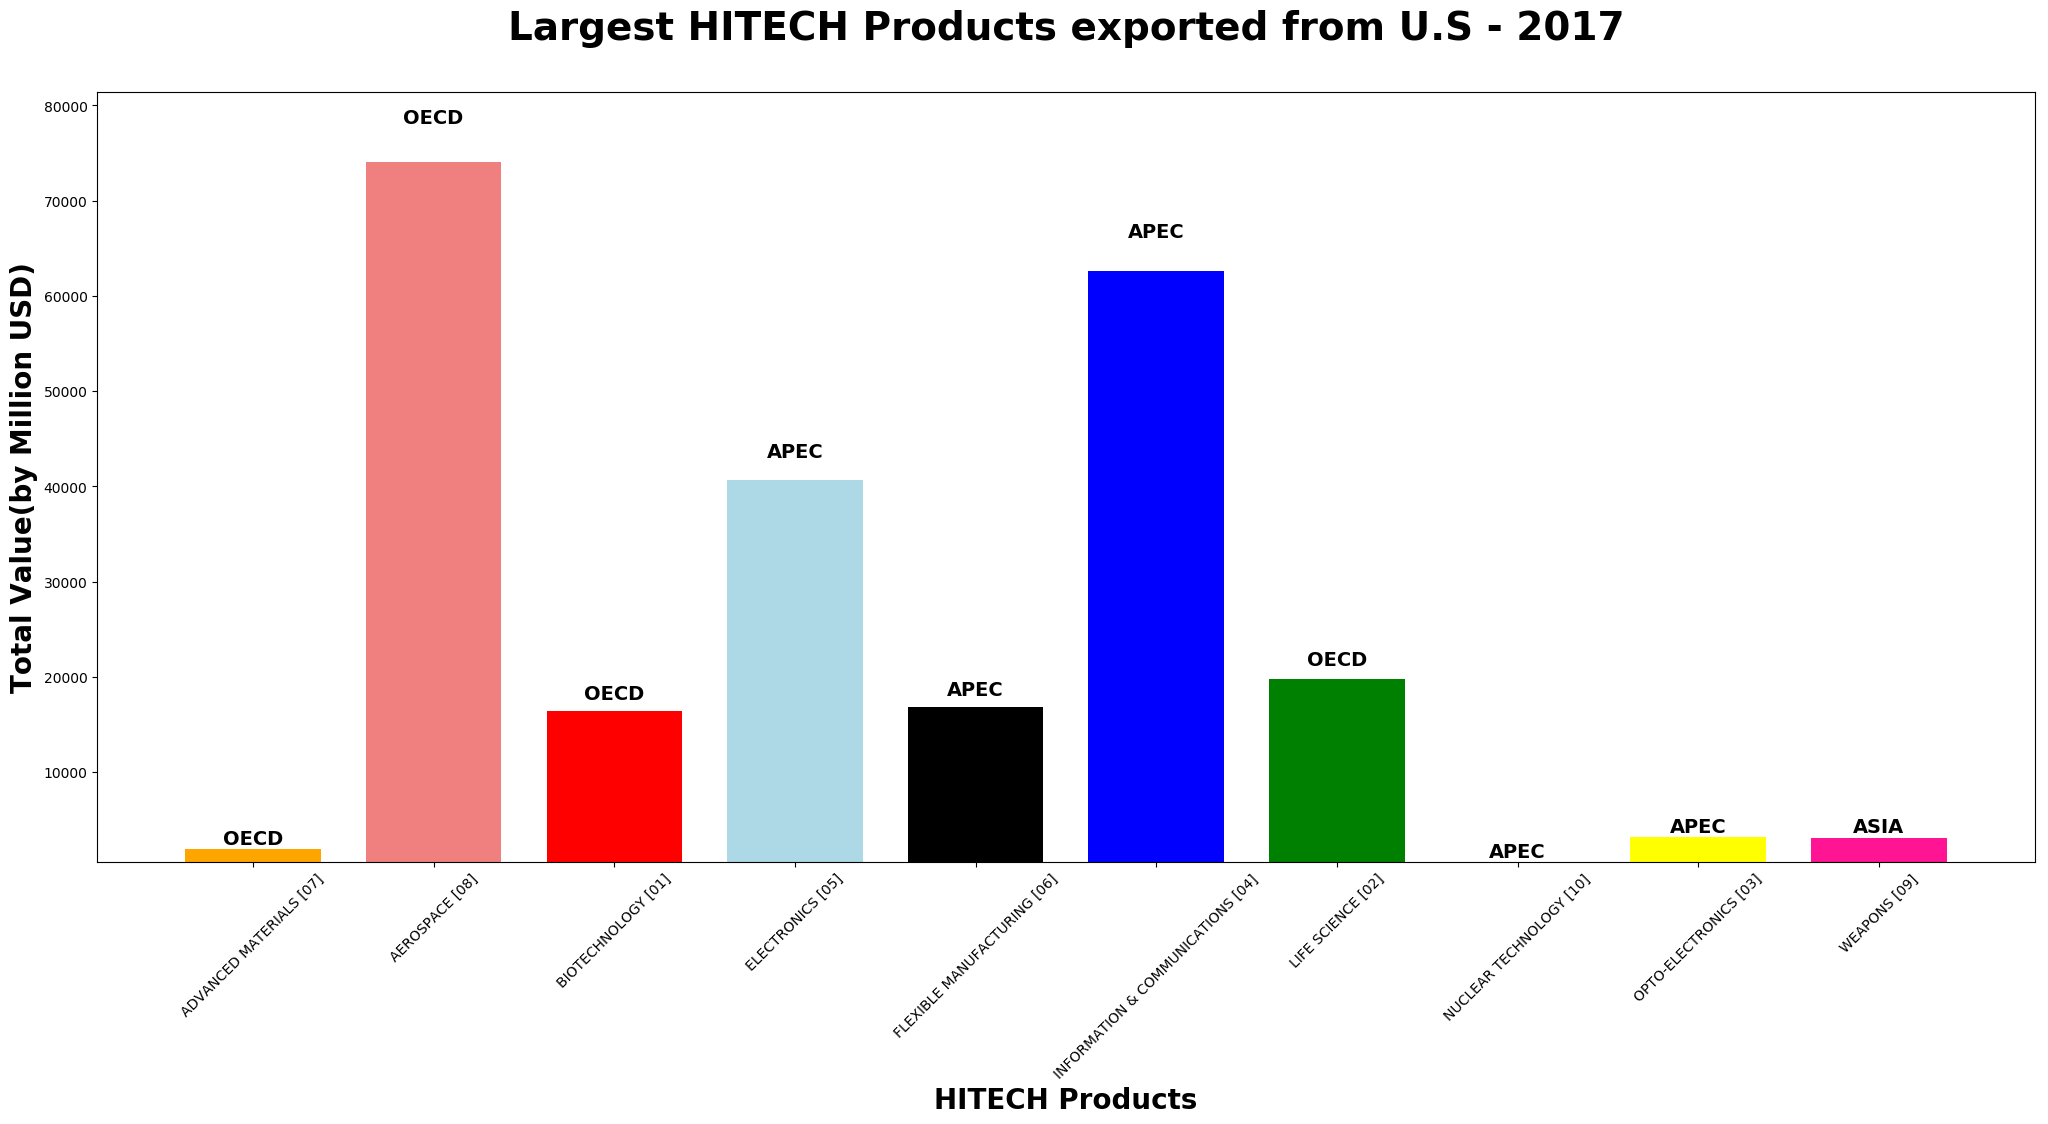

In [316]:
ax = plt.figure(figsize=(25,10)).add_subplot(111)
ch=ax.bar(largestex['Hitech Name'],largestex['Total Value'],color=["red","green","yellow","blue","lightblue","black","orange","lightcoral","deeppink","crimson"],width = 0.75)

for i in range(len(ch)):
        height = ch[i].get_height()
        value=  largestex.iloc[i]['Country Name']
        ax.text(ch[i].get_x() + ch[i].get_width()/2, 1.05*height,value,
                ha='center', va='bottom',fontsize = 14,fontweight="bold")
        
ax.set_ylim(min(largestex['Total Value']),max(largestex['Total Value'])*1.1)
plt.xticks(rotation=45)
ax.set_title("Largest HITECH Products exported from U.S - 2017\n", fontsize = 28,fontweight="bold")
ax.set_xlabel('HITECH Products',fontsize = 20,fontweight="bold")
ax.set_ylabel('Total Value(by Million USD)',fontsize = 20,fontweight="bold")
plt.savefig("largestexport.png")
plt.show()

In [65]:
#Recheck for largest product type
hitechex_group[(hitechex_group["Hitech Name"] == "AEROSPACE [08]") & (hitechex_group["Country Name"] == "OECD")]

,Hitech code,Country Name,Hitech Name,Total Value,Year to Date Total Value
1623,08,OECD,AEROSPACE [08],74039535813,470675439044


# After clarifying the largest value of product type exported from U.S -2017, go details to see which products in that type

In [301]:
df = pd.read_csv('Aerospace.csv')

Exportdetail_totalvalue=[]
Exportdetail_time=[]
Exportdetail_CTYNAME=[]
Hitechdetail=[]
Hitechdetaildesc=[]

print(len(df))
for i in range(len(df)):
    checkerror = False
    check=df["Aerospace code"][i]
    try:
        export_datacode = requests.get(f"https://api.census.gov/data/timeseries/intltrade/exports/hs?get=CTY_CODE,CTY_NAME,ALL_VAL_MO&time=2017&CTY_NAME=OECD&E_COMMODITY={check}&key=f71e81f058685a925a2f209f4ae23944770802fa").json()
    except Exception:
        checkerror = True
        print("Aerospace code is error or null of value")
    if checkerror == False :
        c=1
        while c < len(export_datacode):
            Hitechdetaildesc.append(df["Aerospace desc"][i])
            Exportdetail_totalvalue.append(int(export_datacode[c][2]))
            Exportdetail_time.append(export_datacode[c][3])
            Exportdetail_CTYNAME.append(export_datacode[c][4])
            Hitechdetail.append(export_datacode[c][5])
            c=c+1
export_hitechdetails= pd.DataFrame({"Hitech detail Code":Hitechdetail,"Hitech detail desc":Hitechdetaildesc,"Country Name":Exportdetail_CTYNAME,"Total Value":Exportdetail_totalvalue,"Time":Exportdetail_time})

print(sum(Exportdetail_totalvalue)) # Check exported product type's total value to make sure corresponding with largest exported product type above

52
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace cod

In [300]:
len(export_hitechdetails)

257

In [330]:
hitechdetail_plot = export_hitechdetails.groupby(["Hitech detail Code","Hitech detail desc"]).sum()
hitechdetail_plot.reset_index(inplace=True)
hitechdetail_plot.head(22)

,Hitech detail Code,Hitech detail desc,Total Value
0,8411114050,"TURBOJET A/C TURBINES EXC CIVIL, THRUST LE 25 KN",12533495
1,8411124050,"TURBOJET A/C TURBINES EX CIVIL, THRUST OVER 25",171172103
2,8411214050,"TURBOPRPELLR A/C TBN, EX CIVIL, POWR NT OV 110...",36014580
3,8411224050,"TURBOPROPELLER A/C TBN EXCEPT CIVIL, OV 1100 KW",42225572
4,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",54907442
5,8411824050,"GAS TURBINE A/C TBN EXC CIVIL, OVER 5000 KW",45768014
6,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C...",1053078387
7,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C",661104074
8,8412100010,MISSILE AND ROCKET REACTION ENGINES,50274664
9,8800000000,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",66522004223


In [333]:
hitechdetail_plot['Total Value'] = round(hitechdetail_plot['Total Value']/1000000,2)

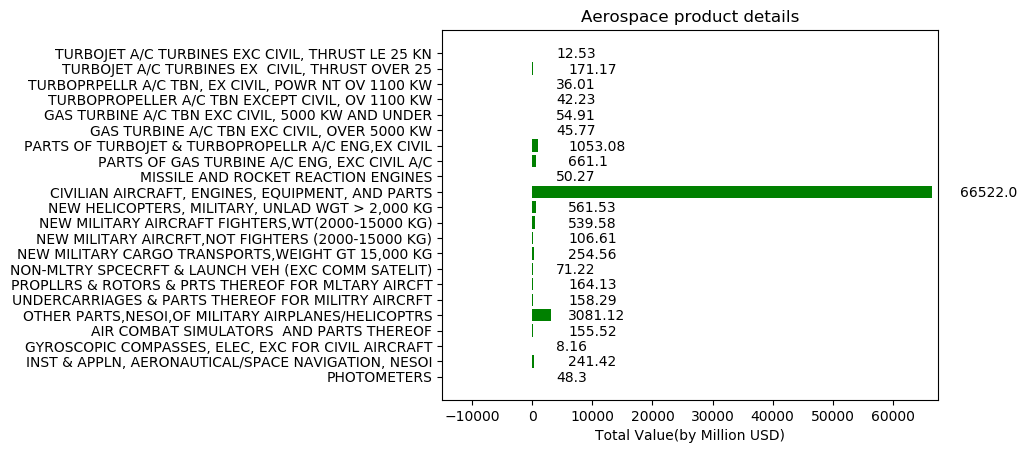

In [336]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
products = hitechdetail_plot['Hitech detail desc']
y_pos = np.arange(len(products))
value = hitechdetail_plot['Total Value']

ch = ax.barh(y_pos, value, align='center',
        color='green', ecolor='black')

for i in range(len(ch)):
        height = ch[i].get_y()
        values =  hitechdetail_plot['Total Value'][i]
        chec= 0
        if (values < 100):
            chec = 4000
        elif (values > 100) & (values < 60000):
            chec = 6000
        elif (values > 60000):
            chec = ch[i].get_width()*1.07
            
        ax.text(ch[i].get_x() + chec, height,values,
                ha='left', va='top',fontsize = 10)
        
ax.set_xlim(min(value)-15000,max(value)+1000)
ax.set_yticks(y_pos)
ax.set_yticklabels(products)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Value(by Million USD)')
ax.set_title('Aerospace product details')
plt.savefig("Aerospaceexport.png")
plt.show()